# Семинар 10-11

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (14, 6)

**Задача.** Пусть решается задача регрессии на одномерной выборке $X = \{ (x_i, y_i)\}_{i=1}^l,$ при этом истинная зависимость целевой переменной является линейной: $y(x) = ax + \varepsilon, \, \varepsilon \sim p(\varepsilon) = \mathcal{N} (0, \sigma^2).$ Допустим, не зная этого, вы обучили на выборке линейную регрессию и решающее дерево с функционалом MSE, и вам известно, что модели не переобучились. После этого вы получили новые данные и построили на них прогнозы обеих моделей, и оказалось, что для решающего дерева значение функционала ошибки на новых данных оказалось радикально выше, чем для линейной регрессии. Чем это может быть вызвано?

**Решение.**
Поскольку истинная зависимость в данных является линейной, логично предположить, что линейная модель покажет лучшие результаты на подобной выборке. Опишем формально ситуацию, в которой у решающего дерева могут возникнуть серьезные проблемы с восстановлением истинной зависимости.

Допустим, обучающая выборка была получена из отрезка $[0; 10],$ обучим соответствующие модели и построим прогнозы для этого отрезка:

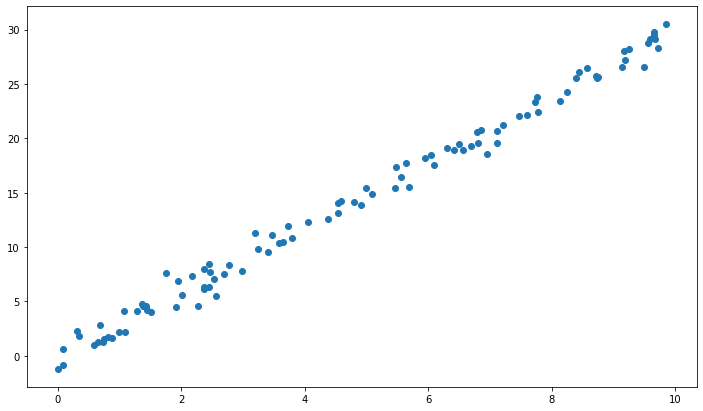

In [3]:
set_size = 100
lin_coef = 3
sigma = 1

np.random.seed(13)

X_train = (np.random.rand(set_size) * 10).reshape(-1, 1)
Y_train = X_train * 3 + sigma * np.random.randn(set_size).reshape(-1, 1)
plt.figure(figsize=(12, 7))
plt.scatter(X_train, Y_train)
plt.show()

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train, Y_train)
tree = DecisionTreeRegressor()
tree.fit(X_train, Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

LR train MSE =  0.7264320462358225
DT train MSE =  0.0


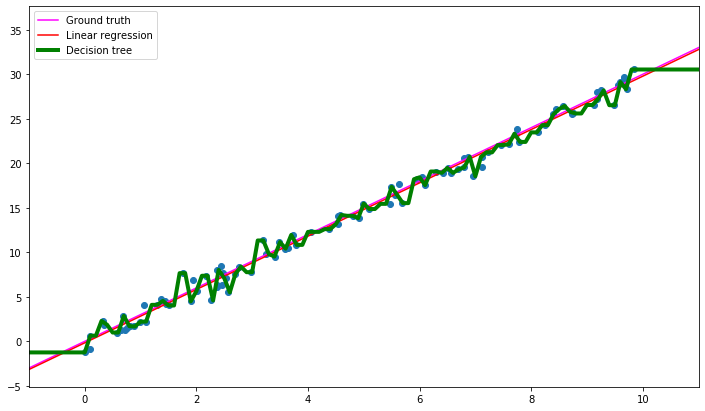

In [8]:
grid = np.arange(-1, 12, 0.1).reshape(-1, 1)

plt.figure(figsize=(12, 7))
plt.scatter(X_train, Y_train)
plt.plot(grid, lin_coef * grid, 'magenta')
plt.plot(grid, lr.predict(grid), 'red',)
plt.plot(grid, tree.predict(grid), 'green', linewidth=4)
plt.xlim([-1, 11])
plt.legend(['Ground truth', 'Linear regression', 'Decision tree'], loc=0)
print ('LR train MSE = ', mean_squared_error(Y_train, lr.predict(X_train)))
print ('DT train MSE = ', mean_squared_error(Y_train, tree.predict(X_train)))

Предположим, что новые данные были получены из другой области пространства ответов, например, из отрезка $[20; 30].$ В этом случае предсказания линейной регрессии окажутся гораздо ближе к правде, что отразится и на значении функционала ошибки:

LR test MSE =  1.0221249155273184
DT test MSE =  2006.0600591143823


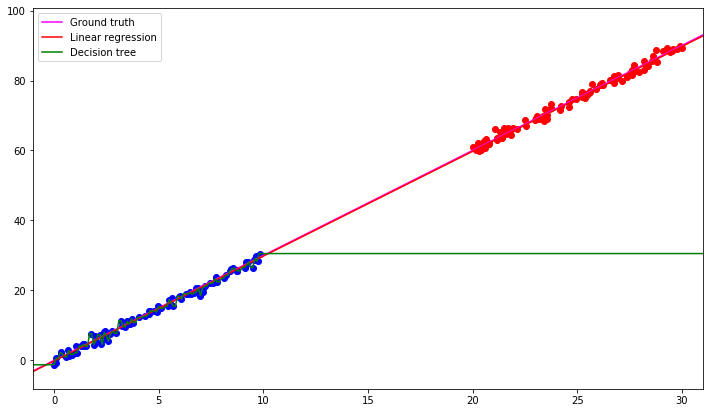

In [9]:
grid = np.arange(-1, 32, 0.1).reshape(-1, 1)

X_test = (20 + np.random.rand(set_size) * 10).reshape(-1, 1)
Y_test = X_test * 3 + sigma * np.random.randn(set_size).reshape(-1, 1)
plt.figure(figsize=(12, 7))
plt.scatter(X_train, Y_train, c='blue')
plt.scatter(X_test, Y_test, c='red')

plt.plot(grid, lin_coef * grid, 'magenta')
plt.plot(grid, lr.predict(grid), 'red',)
plt.plot(grid, tree.predict(grid), 'green')
plt.xlim([-1, 31])
plt.legend(['Ground truth', 'Linear regression', 'Decision tree'], loc=0)
print ('LR test MSE = ', mean_squared_error(Y_test, lr.predict(X_test)))
print ('DT test MSE = ', mean_squared_error(Y_test, tree.predict(X_test)))

**Вывод**: решающие деревья (а потому и композиции над ними) непригодны для экстраполяции функций.

## Решающее дерево регрессии

Сгенерируем искусственный датасет.

In [10]:
np.random.seed(13)

n = 202
X = np.linspace(-2, 2, n).reshape(-1, 1)
X = np.c_[X, X ** 2, X ** 3]
y = np.sin(X[:, 0] ** 4) + np.random.random(size=n) / 2
y = y.ravel()
pd.DataFrame({'x': X[:, 0], 'y': y}).head()

,x,y
0,-2.000000,0.100948
1,-1.980100,0.447858
2,-1.960199,1.222096
3,-1.940299,1.482218
4,-1.920398,1.345880


Добейтесь наименьшего MSE для регрессора ниже. Какая максимальная глубина ему соответствует?

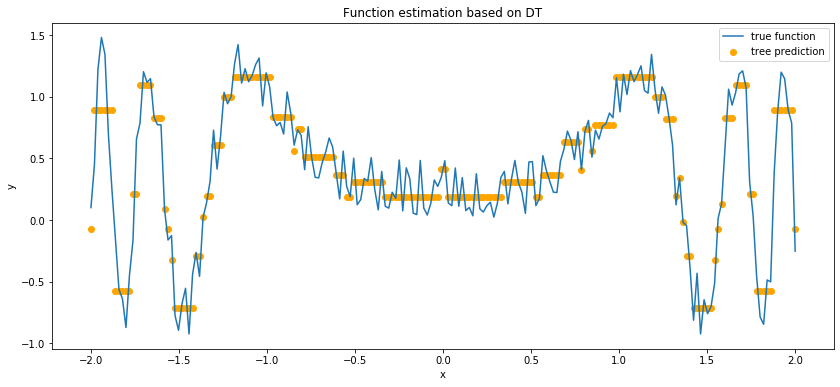

Mean Squared Error:  0.027055846191103183


In [11]:
plt.plot(X[:, 0], y, label='true function')
plt.title('Function estimation based on DT')
plt.xlabel('x')
plt.ylabel('y')

# train and predict a regression tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

clf = DecisionTreeRegressor(max_depth=5)
clf.fit(X, y)
y_pred = clf.predict(X)

plt.scatter(X[:, 0], y_pred, label='tree prediction', color='orange')
plt.legend(loc='best')
plt.show()

print('Mean Squared Error: ', mean_squared_error(y, y_pred))

Теперь давайте найдем оптимальную глубину с помощью отложенной выборки.

train MSE:  0.025291302962733308
test MSE:  0.05997828771189103


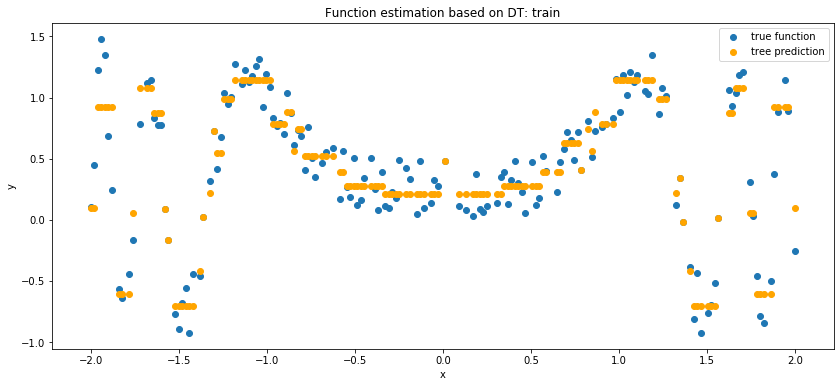

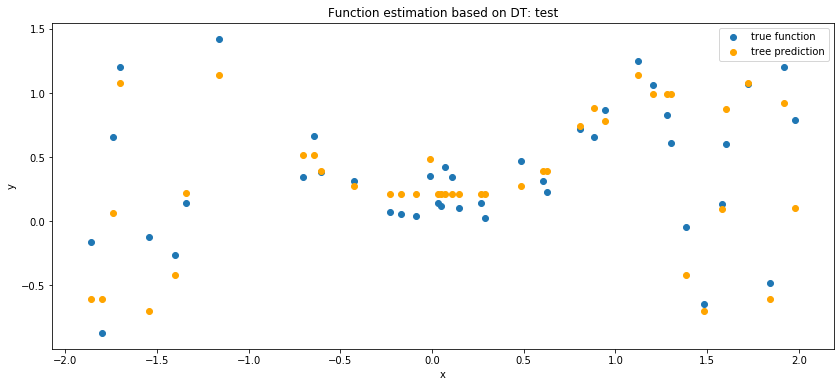

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

clf = DecisionTreeRegressor(max_depth=5, random_state=13)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_train)
print('train MSE: ', mean_squared_error(y_train, clf.predict(X_train)))
print('test MSE: ', mean_squared_error(y_test, clf.predict(X_test)))

plt.figure()
plt.scatter(X_train[:, 0], y_train, label='true function')
plt.scatter(X_train[:, 0], clf.predict(X_train), label='tree prediction', color='orange')
plt.title('Function estimation based on DT: train')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')

plt.figure()
plt.scatter(X_test[:, 0], y_test, label='true function')
plt.scatter(X_test[:, 0], clf.predict(X_test), label='tree prediction', color='orange')
plt.title('Function estimation based on DT: test')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
plt.show()

## Бэггинг

В дереве регрессий мы ограничивали максимальную глубину дерева для предотвращения переобучения. Как еще можно бороться с переобучением? Давайте попробуем метод бэггинга, позволяющий использовать композицию деревьев, обученных на различных подвыборках обучающей выборки. Ответ - усредненное значение ответов для каждого дерева. Таким образом, обучая деревья на различных подвыборках, мы стараемся сделать их менее скоррелированными.

Подберите оптимальное значение максимальной глубины дерева для метода бэггинга. Попробуйте также менять параметр `n_estimators` - за что он отвечает? Нужно ли менять другие гиперпараметры?

train MSE:  0.015058619416684208
test MSE:  0.03697451624079801


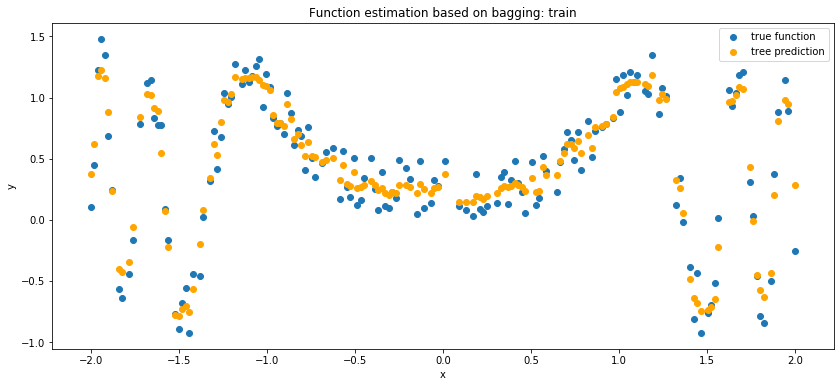

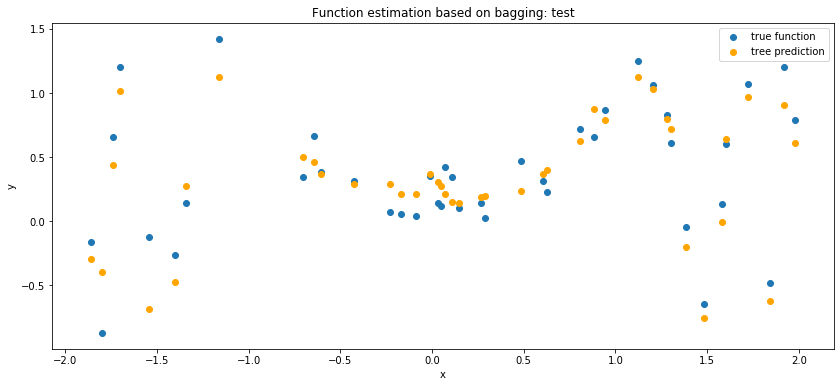

In [13]:
from sklearn.ensemble import BaggingRegressor

clf = BaggingRegressor(DecisionTreeRegressor(max_depth=6), n_estimators=30, random_state=13)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_train)
print('train MSE: ', mean_squared_error(y_train, clf.predict(X_train)))
print('test MSE: ', mean_squared_error(y_test, clf.predict(X_test)))

plt.figure()
plt.scatter(X_train[:, 0], y_train, label='true function')
plt.scatter(X_train[:, 0], clf.predict(X_train), label='tree prediction', color='orange')
plt.title('Function estimation based on bagging: train')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')

plt.figure()
plt.scatter(X_test[:, 0], y_test, label='true function')
plt.scatter(X_test[:, 0], clf.predict(X_test), label='tree prediction', color='orange')
plt.title('Function estimation based on bagging: test')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
plt.show()

Как видно, ответы, полученные с помощью бэггинга, меньше выстраиваются в кусочно-постоянные области. Почему так происходит? Как это может помочь в решении задачи?

## Случайный лес

<img src="https://cdn-images-1.medium.com/max/1560/1*10t9S7xvWE5Z3NEZrmHG2w.jpeg" width=700>

Как можно сделать деревья еще менее скоррелированными? Обучать каждое дерево в ансамбле не только на случайной подвыборке, но и на случайном подмножестве признаков.

Подберите оптимальные значения параметров случайного леса.

train MSE:  0.014624191544061757
test MSE:  0.03657844068559379


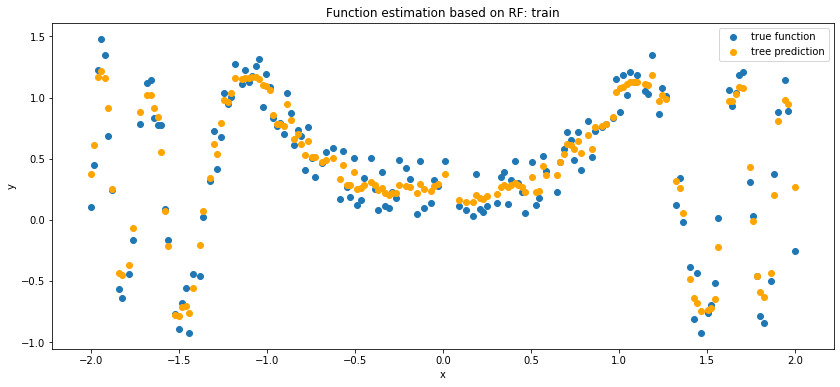

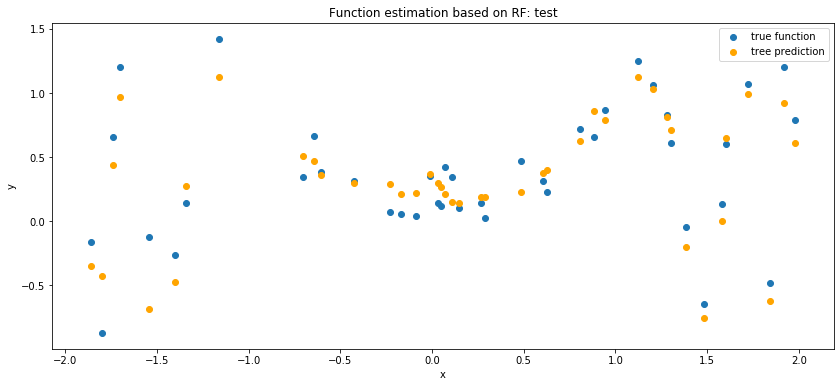

In [16]:
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(n_estimators=30, max_depth=6, random_state=13)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_train)
print('train MSE: ', mean_squared_error(y_train, clf.predict(X_train)))
print('test MSE: ', mean_squared_error(y_test, clf.predict(X_test)))

plt.figure()
plt.scatter(X_train[:, 0], y_train, label='true function')
plt.scatter(X_train[:, 0], clf.predict(X_train), label='tree prediction', color='orange')
plt.title('Function estimation based on RF: train')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')

plt.figure()
plt.scatter(X_test[:, 0], y_test, label='true function')
plt.scatter(X_test[:, 0], clf.predict(X_test), label='tree prediction', color='orange')
plt.title('Function estimation based on RF: test')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
plt.show()

## Градиентный бустинг

Идея бустинга - будем обучать алгоритмы в композиции не независимо, а последовательно, так, чтобы каждый следующий старался исправить ошибки построенной композиции. Начальное предсказание можно просто инициализировать константой. Далее, пусть $N - 1$ алгоритмов в композиции уже построены:

$$
a_{N - 1}(x) = \sum\limits_{n = 1}^{N - 1}b_n(x)
$$

Следующий алгоритм $b_N(x)$ получается из следующей задачи оптимизации:

$$
\frac{1}{\ell}\sum\limits_{i=1}^{\ell}\left(b_N(x_i) - (y_i - a_{N - 1}(x_i))\right)^2 \to \min\limits_{b_N}
$$

Таким образом, если удастся решить эту задачу идеально, то для каждого объекта $x_i$ будет верно:

$$
b_N(x_i) - (y_i - a_{N - 1}(x_i)) = 0 \Rightarrow y_i = a_{N - 1}(x_i) + b_N(x_i) = a_N(x_i)
$$

**Общий вид.** Пусть $L$ - функция потерь. Тогда общая задача оптимизации выглядит следующим образом:

$$
\frac{1}{\ell}\sum\limits_{i=1}^{\ell}L\left(y_i, a(x_i)\right) \to \min_a,
$$

где $a$ - это взвешенная комбинация базовых моделей:

$$
a(x_i) = \sum\limits_n\gamma_nb_n(x_i)
$$

Далее, пусть $N - 1$ алгоритмов в композиции уже построены:

$$
a_{N - 1}(x) = \sum\limits_{n = 1}^{N - 1}\gamma_nb_n(x)
$$

Следующий алгоритм $b_N(x)$ получается из следующей задачи оптимизации:

$$
\frac{1}{\ell}\sum\limits_{i=1}^{\ell}L\left(y_i, a_{N - 1}(x_i) + \gamma_Nb_N(x_i)\right) \to \min\limits_{\gamma_N, b_N}
$$

Таким образом, для каждого $x_i$ мы хотим найти $b_N(x_i)$, минимизирующий $L\left(y_i, a_{N - 1}(x_i) + b_N(x_i)\right)$, а также оптимальную длину шага. Для этого давайте проделаем что-то вроде градиентного спуска в пространстве алгоритмов:

$$
b_N(x_i) = -\frac{\partial L(y_i, z)}{\partial z}\Bigl|_{z = a_{N - 1}(x_i)}
$$

Если подставить это значение в задачу оптимизации, то можно заметить, что мы действительно "сдвинули" значение функции потерь в сторону наискорейшего убывания по $a_{N - 1}(x_i)$. Следовательно, градиентный бустинг можно рассматривать как процесс градиентного спуска в пространстве алгоритмов.

Итак, очередной базовый алгоритм $b_N(x)$ можно обучить предсказывать $-\frac{\partial L(y_i, z)}{\partial z}\Bigl|_{z = a_{N - 1}(x)}$. В свою очередь, после этого уже можно получить оптимальный шаг:

$$
\gamma_N = \mathrm{arg}\min_\gamma \frac{1}{\ell}\sum\limits_{i=1}^{\ell}L\left(y_i, a_{N - 1}(x_i) + \gamma b_N(x_i)\right)
$$

**Вопрос.** Если градиентный бустинг решает задачу классификации, то какую задачу решает каждый из его базовых алгоритмов?

Подберите оптимальные значения параметров градиентного бустинга.

train MSE:  1.7028330800760757e-05
test MSE:  0.04552915157362834


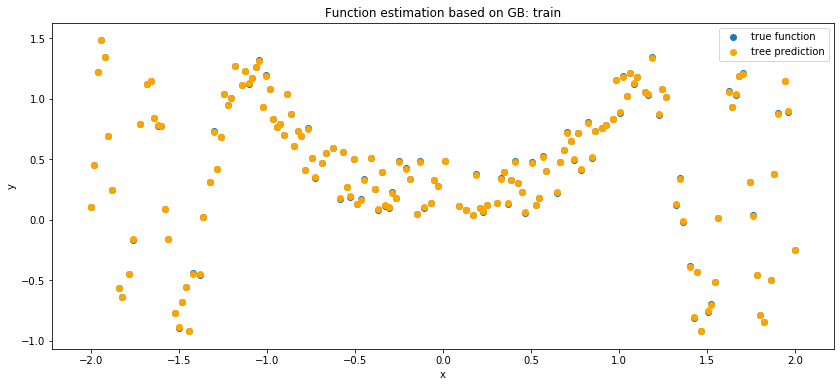

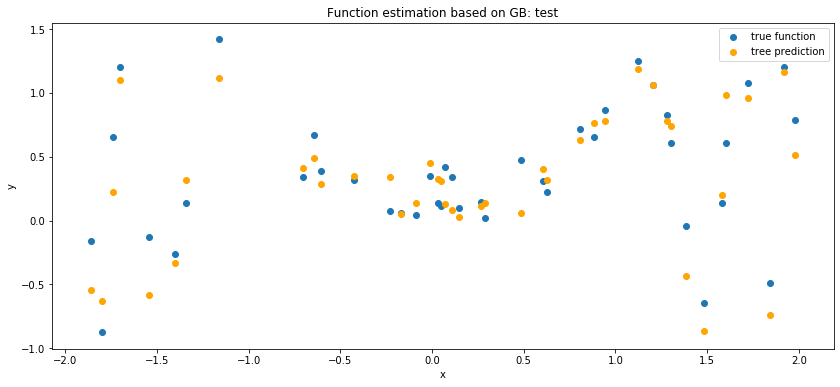

In [17]:
from sklearn.ensemble import GradientBoostingRegressor

clf = GradientBoostingRegressor(max_depth=4, learning_rate=1e-2, n_estimators=5000, random_state=13)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_train)
print('train MSE: ', mean_squared_error(y_train, clf.predict(X_train)))
print('test MSE: ', mean_squared_error(y_test, clf.predict(X_test)))

plt.figure()
plt.scatter(X_train[:, 0], y_train, label='true function')
plt.scatter(X_train[:, 0], clf.predict(X_train), label='tree prediction', color='orange')
plt.title('Function estimation based on GB: train')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')

plt.figure()
plt.scatter(X_test[:, 0], y_test, label='true function')
plt.scatter(X_test[:, 0], clf.predict(X_test), label='tree prediction', color='orange')
plt.title('Function estimation based on GB: test')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
plt.show()

## Разделяющие поверхности

In [18]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap,
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

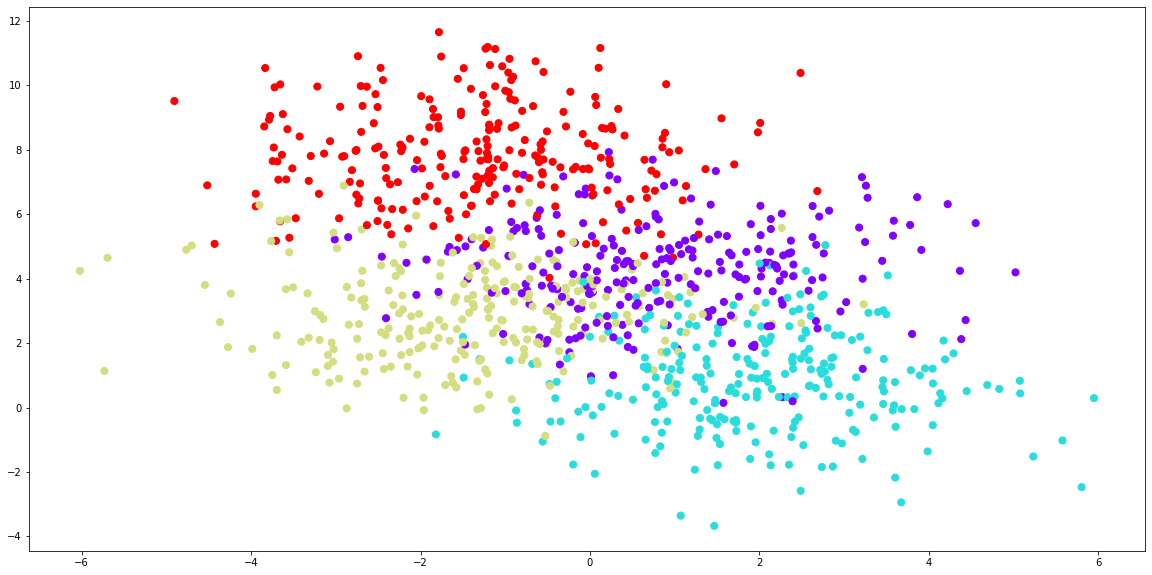

In [19]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1000, centers=4,
                  random_state=0, cluster_std=1.5)
plt.figure(figsize=(20,10))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

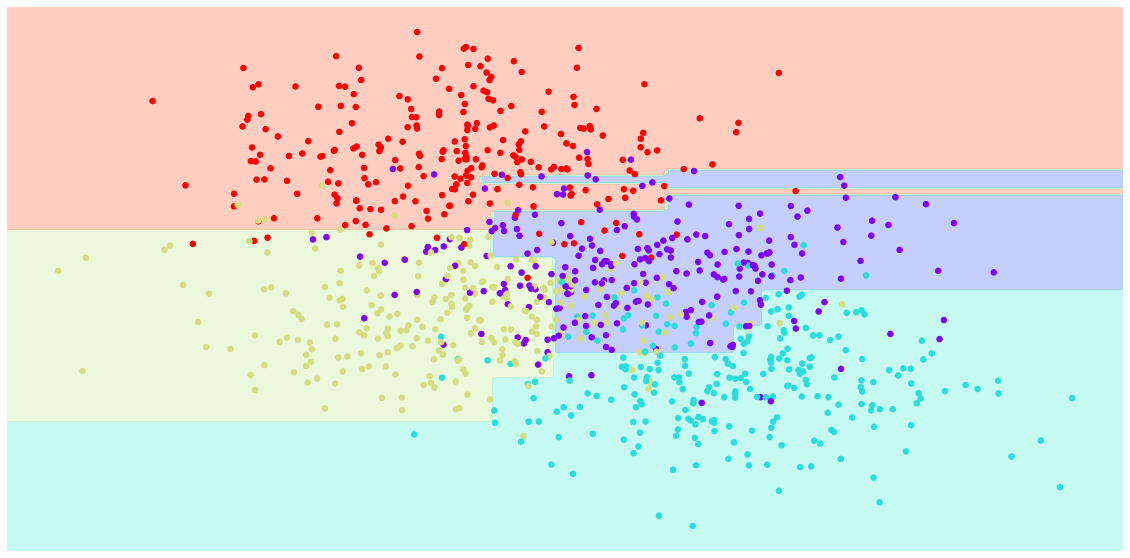

In [20]:
from sklearn.tree import DecisionTreeClassifier
clf_r = DecisionTreeClassifier(max_depth=5)
plt.figure(figsize=(20,10))
visualize_classifier(clf_r, X, y, ax=None, cmap='rainbow')

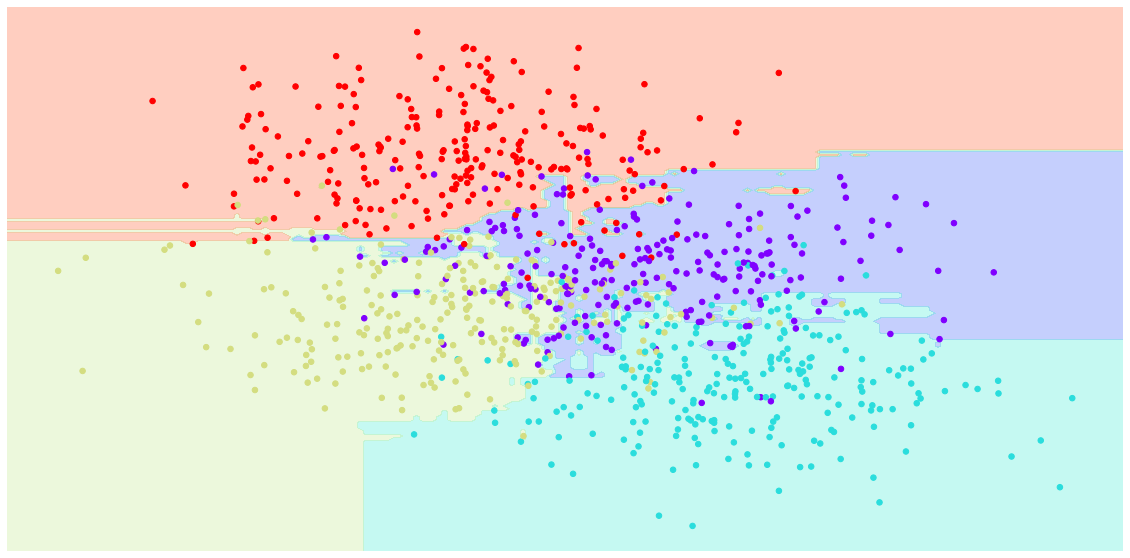

In [21]:
from sklearn.ensemble import RandomForestClassifier
clf_r = RandomForestClassifier(n_estimators=1000, max_depth=10)
plt.figure(figsize=(20,10))
visualize_classifier(clf_r, X, y, ax=None, cmap='rainbow')

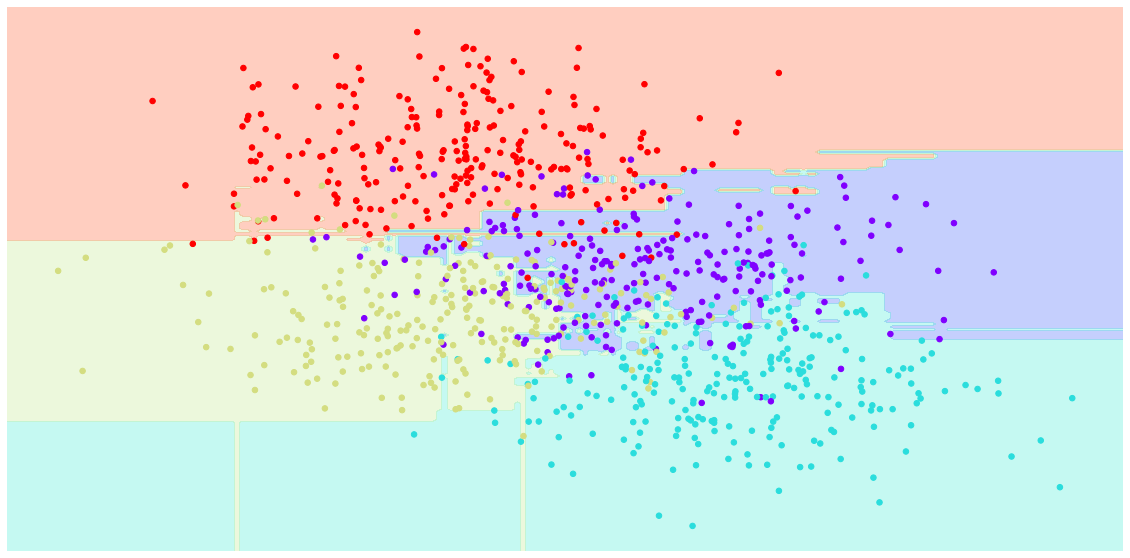

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
clf_r = GradientBoostingClassifier(n_estimators=1000, learning_rate=1e-2, max_depth=3)
plt.figure(figsize=(20,10))
visualize_classifier(clf_r, X, y, ax=None, cmap='rainbow')

## Catboost

Для построения моделей градиентного бустинга можно использовать различные библиотеки - одними из самых популярных являются `xgboost`, `lightgbm`, `catboost`. Построим модель из `catboost` на основе данных о пассажирах с Титаника.

In [23]:
data = pd.read_csv('titanic-train.csv')
X = data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = data['Survived']
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [24]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

Catboost спокойно справляется как с категориальными признаками, принимающими значения строк, так и с пропусками. Единственное - не справляется с пропусками в категориальных признаках :)

In [25]:
X.isnull().any()

Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare        False
Embarked     True
dtype: bool

In [26]:
X[X.columns[X.dtypes == 'object']] = X[X.columns[X.dtypes == 'object']].fillna('NaN')
X.isnull().any()

Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare        False
Embarked    False
dtype: bool

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [28]:
#!pip install catboost

Изучите параметры в документации (https://catboost.ai/docs/concepts/python-reference_parameters-list.html) и подберите оптимальные с помощью кросс-валидации.

https://catboost.ai/docs/concepts/parameter-tuning.html

best cv accuracy score: 0.7963987282676784
test accuracy score: 0.8379888268156425


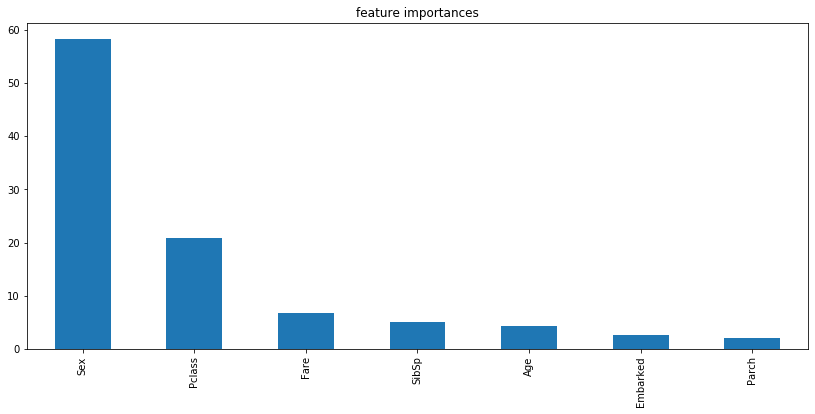

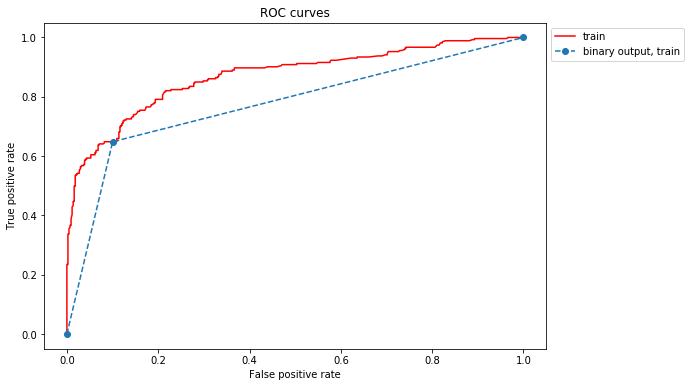

In [29]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_curve

cb = CatBoostClassifier(
    loss_function='Logloss',
    cat_features=np.where(X_train.columns.isin(['Sex', 'Embarked']))[0], # categorical features processing
    silent=True
)

param_grid = {
    'max_depth': [1, 3, 5],
    'n_estimators': [50, 150],
    'learning_rate': [0.001, 0.01]
}

grid_cv = GridSearchCV(cb, param_grid, cv=3)
grid_cv.fit(X_train, y_train)

print('best cv accuracy score:', grid_cv.best_score_)

cb_best = grid_cv.best_estimator_
print('test accuracy score:', accuracy_score(y_test, cb_best.predict(X_test)))

# feature importances
fi = pd.Series(cb_best.feature_importances_, index=X_train.columns)
fi.sort_values(ascending=False).plot(kind='bar')
plt.title('feature importances')
plt.show()

# ROC curves
plt.figure(figsize=[9, 6])
fpr, tpr, _ = roc_curve(y_train, cb_best.predict_proba(X_train)[:, 1])
plt.plot(fpr, tpr, 'r', label='train')
fpr, tpr, _ = roc_curve(y_train, cb_best.predict(X_train))
plt.plot(fpr, tpr, '--o', label='binary output, train')
plt.legend(bbox_to_anchor=(0.999, 1))
plt.title('ROC curves')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

In [30]:
from sklearn.metrics import classification_report

In [32]:
print(classification_report(y_test, cb_best.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       110
           1       0.81      0.75      0.78        69

    accuracy                           0.84       179
   macro avg       0.83      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179

